# Classification

Data scientist are often faced with a problen that requires an 0/1 decision. Where the 1 is the predicted class we are intrested in: is an email spam, is the customer going to churn. The overall goal of classification is to predict whether a record is a 0 or 1 (spam/not spam). 

Often we need more than a simple binary classification, we need to know the popability that an event will occur. The pobability an email is spam or not spam. 

Logistic Regression can return a probability that given row of features belongs to a given class. The overall general approach to detemining if the row will be labeled a 0 or 1 is as follows:
1. Establish a cutoff probability for the class of interest above which we consider a record as belonging to that class. 
2. Estimate (with any model) the probability that a recored belongs to the class of interest. 
3. If that probability is above the cutoff probability, assign the new record to the class of interest. 
The higher the cutoff, the fewer records predicted as 1 and vice versa the lower the cutoff, the more records predicted as 1. 

## Logistic Regression

Logistic regression is analogous to multiple linear regession, except that outcome is binary. Various transforms are employed to convert the problem to one in which a linear model can be fit. How do we get a binary outcome variable to an outcome variable that can be modeled in linear fashion, then back again to a binary outcome? 

In [1]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
iris = pd.read_csv(url, sep=',')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
print(iris['species'].value_counts())

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64


## Viz the iris dataset

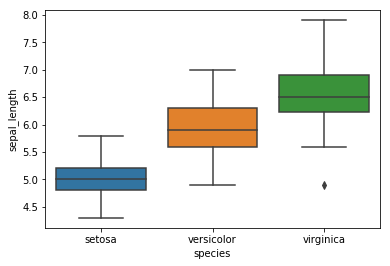

In [8]:
sns.boxplot(x='species', y='sepal_length', data=iris)

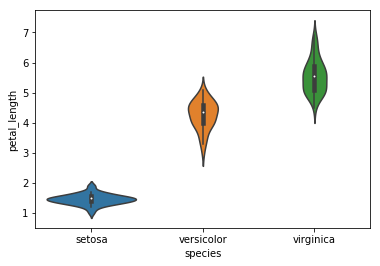

In [9]:
sns.violinplot(x='species', y='petal_length', data=iris)

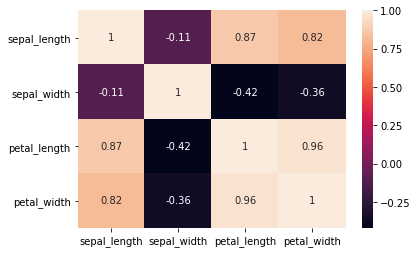

In [10]:
sns.heatmap(iris.corr(), annot=True)

## Coding Logistic Regression

The key ingredients are logistic repsonse function and the logit, in which we map a probability (which is on a 0-1 scale) to a more expansive scale suitable for linear modeling. 

The first step is to think of the outcome variable not as a binary label, but as the probability p that the label is a 1. We get a linear euqation of the odds of the outcome happening:
odd = B0 + B1 * X1 + B2 * X2 + .... + Bn * Xn
To get the odd to a probability we have to the logit of the linear equation:
p = 1 / (1 + e ^-(B0 + B1 * X1 + B2 * X2 + .... + Bn * Xn) - The transform ensures that the p stays between 0 and 1. 

In [12]:
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1].values

In [13]:
X.head(), y[:5]

(   sepal_length  sepal_width  petal_length  petal_width
 0           5.1          3.5           1.4          0.2
 1           4.9          3.0           1.4          0.2
 2           4.7          3.2           1.3          0.2
 3           4.6          3.1           1.5          0.2
 4           5.0          3.6           1.4          0.2,
 array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object))

In [14]:
# We make the predicted class equal to setosa
y = (y=='setosa')

In [15]:
y[:5]

array([ True,  True,  True,  True,  True], dtype=bool)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr_model = LogisticRegression()

In [20]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
# Get the coeffiecents and intercept of X's features
lr_model.coef_, lr_model.intercept_

(array([[ 0.3772247 ,  1.40600301, -2.15483613, -0.96464548]]),
 array([ 0.24963435]))

odds of being a setosa = 0.377 x sepal_length + 1.406 x sepal_width + -2.154 x pedal_lenght + -0.96 x petal_width + .249

In [22]:
print(X.iloc[2,:], y[2])

sepal_length    4.7
sepal_width     3.2
petal_length    1.3
petal_width     0.2
Name: 2, dtype: float64 True


probability of being a setosa = 0.377 x 4.7 + 1.406 x 3.2 + -2.154 x 1.3 + -0.96 x 0.2 + .249 = 3.527

Next we map this to logic function to get a probality between 0 and 1

p = 1 / (1 + e^-(3.527)) = 97.14% chance of being a setosa

In [23]:
# Predict the Iris at row 2
y_pred_2 = lr_model.predict(X.iloc[2, :].values.reshape(1,-1))

In [24]:
y_pred_2

array([ True], dtype=bool)

The predicted answer of True means the model predicted it was Setosa with features at row 2 

1. sepal_length    4.7
2. sepal_width     3.2
3. petal_length    1.3
4. petal_width     0.2

In [25]:
# Predict the proability of setosa vs not setosa
y_pred_prob_2 = lr_model.predict_proba(X.iloc[2, :].values.reshape(1,-1))

In [26]:
y_pred_prob_2

array([[ 0.02853749,  0.97146251]])

The array gives us a 2.85% chance of not being a setosa vs 97.14% chance of being a setosa. Which matches the same probability we calculated by hand above using the logit function

In [27]:
y_pred = lr_model.predict(X_test)

In [28]:
y_pred_prob = lr_model.predict_proba(X_test)

In [29]:
y_pred_prob[:, 1]

array([  8.18047489e-03,   9.77903926e-01,   3.44081893e-05,
         1.04222072e-02,   7.08865068e-03,   9.69199679e-01,
         7.09657784e-02,   2.47940355e-03,   4.22670576e-03,
         3.46333876e-02,   3.27502066e-03,   9.59499085e-01,
         9.85952513e-01,   9.58030078e-01,   9.81918942e-01,
         1.20662576e-02,   4.52321151e-04,   2.69128244e-02,
         9.81307404e-03,   5.05922233e-04,   9.46905862e-01,
         3.96473018e-03,   9.56168108e-01,   5.57128705e-04,
         7.86036255e-04,   1.61181124e-03,   3.55239137e-04,
         4.91161714e-04,   9.51300336e-01,   9.41489409e-01])

In [30]:
y_test

array([False,  True, False, False, False,  True, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True,  True], dtype=bool)

In [31]:
y_pred

array([False,  True, False, False, False,  True, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True,  True], dtype=bool)

Text(0,0.5,'Probability of being a Setosa')

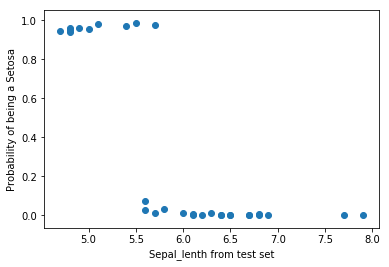

In [32]:
plt.scatter(X_test['sepal_length'], y_pred_prob[:, 1])
plt.xlabel('Sepal_lenth from test set')
plt.ylabel('Probability of being a Setosa')

Text(0,0.5,'Probability of being a Setosa')

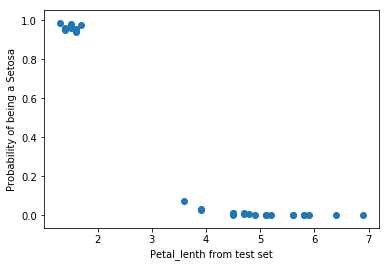

In [33]:
plt.scatter(X_test['petal_length'], y_pred_prob[:, 1])
plt.xlabel('Petal_lenth from test set')

plt.ylabel('Probability of being a Setosa')